In [157]:
import matplotlib.pyplot as plt  # For plots
import seaborn  # For prettier plots
import time  # Deal with time stamps
import datetime  # Deal with time stamps again
import pandas  # Data stuff
import numpy as np  # For fitting data
import matplotlib.dates as mdates  # For handling dates
%matplotlib inline

# Strategies by date

In [158]:
df = pandas.read_csv('data', header=None, names=['Dates', 'Strategies', 'Hash'])
times = [time.strptime(time.asctime(time.gmtime(float(d)))) for d in df['Dates']]
dates = [datetime.datetime.fromtimestamp(time.mktime(t)) for t in times]
df['Dates'] = dates
df['AbsStrategies'] = [max(n, max(nbrs[:i+1])) for i, n in enumerate(df['Strategies'])]

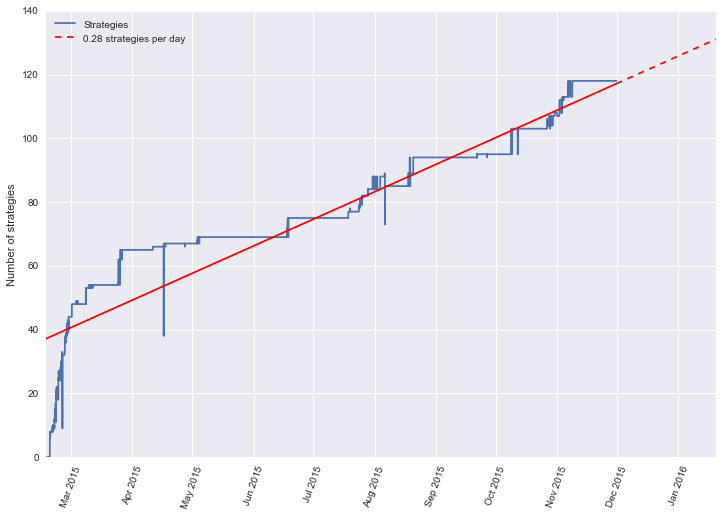

In [159]:
x = mdates.date2num(list(df.Dates))
degree = 1
fit = np.polyfit(x, df.Strategies, degree)
line = np.poly1d(fit)
numerical_dates = np.linspace(x.min(), x.max())

projection = 50
project_x = np.linspace(numerical_dates[-1], numerical_dates[-1] + projection, projection)

plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['Strategies'], where='post')
plt.plot(numerical_dates, line(numerical_dates), 'r')

plt.plot(project_x, line(project_x), 'r', linestyle='dashed', label='{0:.2f} strategies per day'.format(line[1]))
plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.legend(loc=2)
plt.savefig('actual_number_of_strategies.pdf');

The slope of the line:

In [160]:
line[1]

0.27830798282457836

This happens over

In [161]:
int((df.Dates.iloc[-1] - df.Dates.iloc[0]).days)

287

days.

Here is the same analysis but ignoring a dip in the number of strategies (due to a commit that perhaps removed some strategies temporarily).

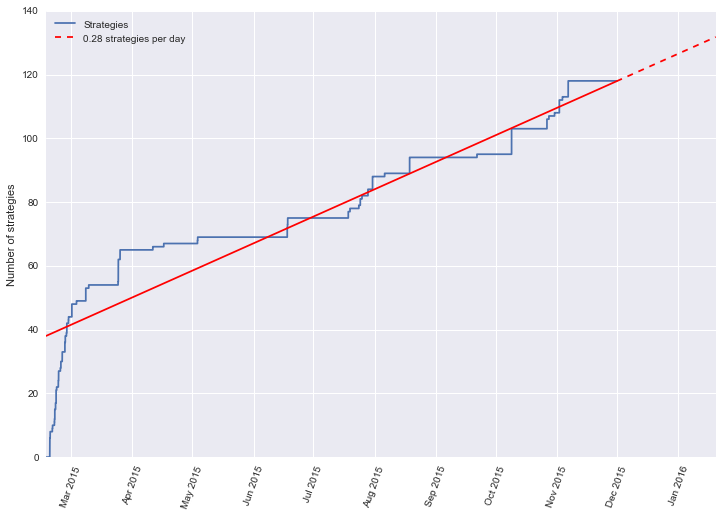

In [162]:
x = mdates.date2num(list(df.Dates))
degree = 1
fit = np.polyfit(x, df.AbsStrategies, degree)
line = np.poly1d(fit)
numerical_dates = np.linspace(x.min(), x.max())

projection = 50
project_x = np.linspace(numerical_dates[-1], numerical_dates[-1] + projection, projection)

plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['AbsStrategies'], where='post', label='Strategies')
plt.plot(numerical_dates, line(numerical_dates), 'r')

plt.plot(project_x, line(project_x), 'r', linestyle='dashed', label='{0:.2f} strategies per day'.format(line[1]))
plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.legend(loc=2)
plt.savefig('number_of_strategies.pdf');

Let us try and fit an ARIMA model.

In [163]:
from statsmodels.tsa.arima_model import ARIMA

In [164]:
order = (2, 1, 2)
model = ARIMA(df.Strategies.map(float), order, freq='D', dates=df['Dates'])
model = model.fit()

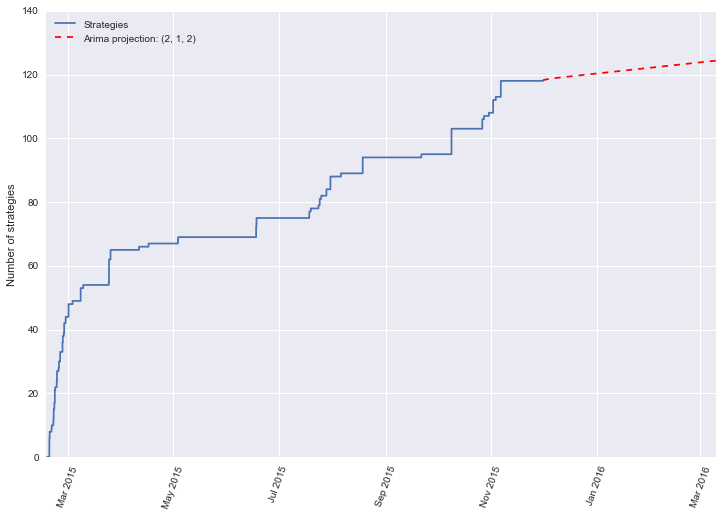

In [165]:
x = mdates.date2num(list(df.Dates))
degree = 1
fit = np.polyfit(x, df.AbsStrategies, degree)
line = np.poly1d(fit)
numerical_dates = np.linspace(x.min(), x.max())

projection = 100
project_x = np.linspace(numerical_dates[-1], numerical_dates[-1] + projection, projection)

plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['AbsStrategies'], where='post', label='Strategies')
#plt.plot(numerical_dates, line(numerical_dates), 'r')

plt.plot(project_x, model.forecast(projection)[0], 'r', linestyle='dashed', label='Arima projection: {}'.format(order))
plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.legend(loc=2)
plt.savefig('number_of_strategies_with_arima_projection.pdf');